前几行数据：
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                             bio  \
0                                                            NaN   
1  I just press the buttons randomly, and the program evolves...   
2                     Time is unimportant,\nonly life important.   
3                                                            NaN   
4                                                            NaN   

   public_repos  public_gists  followers  following  \
0            26             1          5          1   
1            30             3          9          6   
2           103       

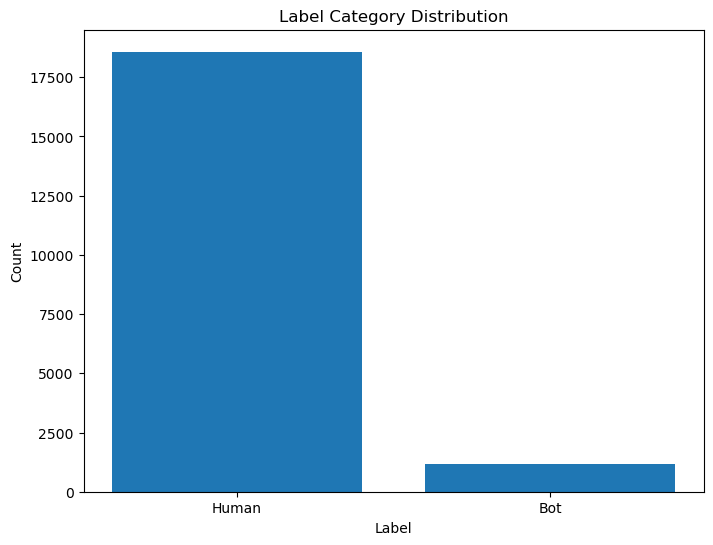

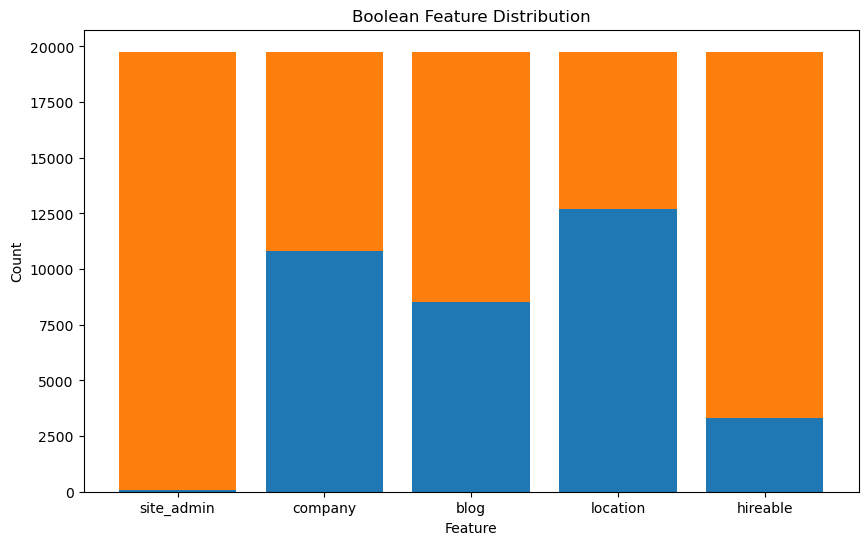

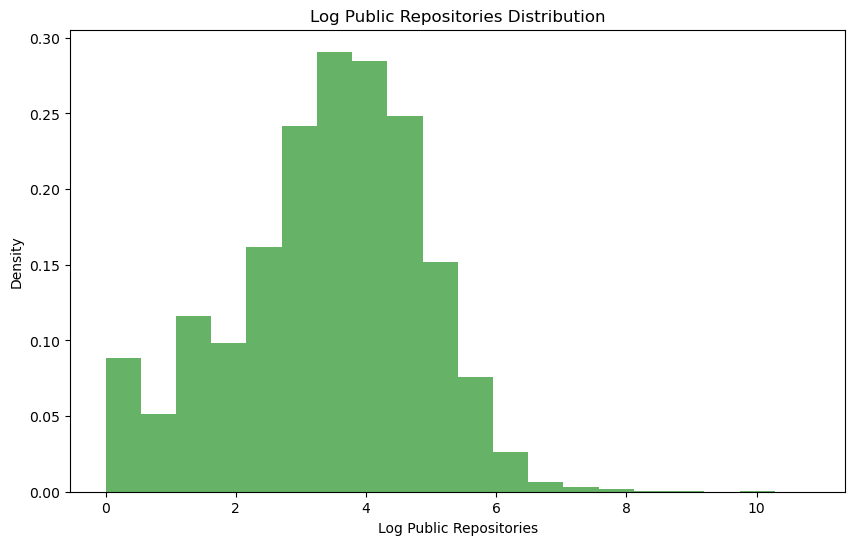

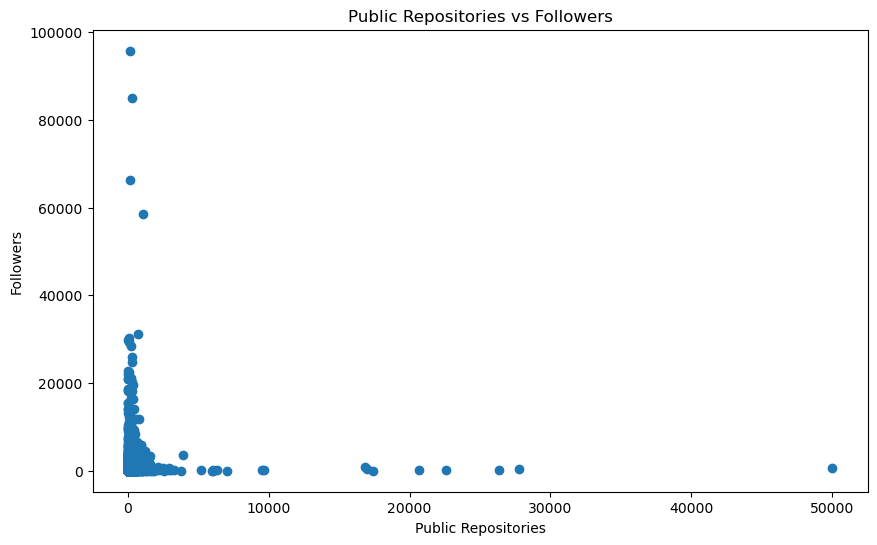

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

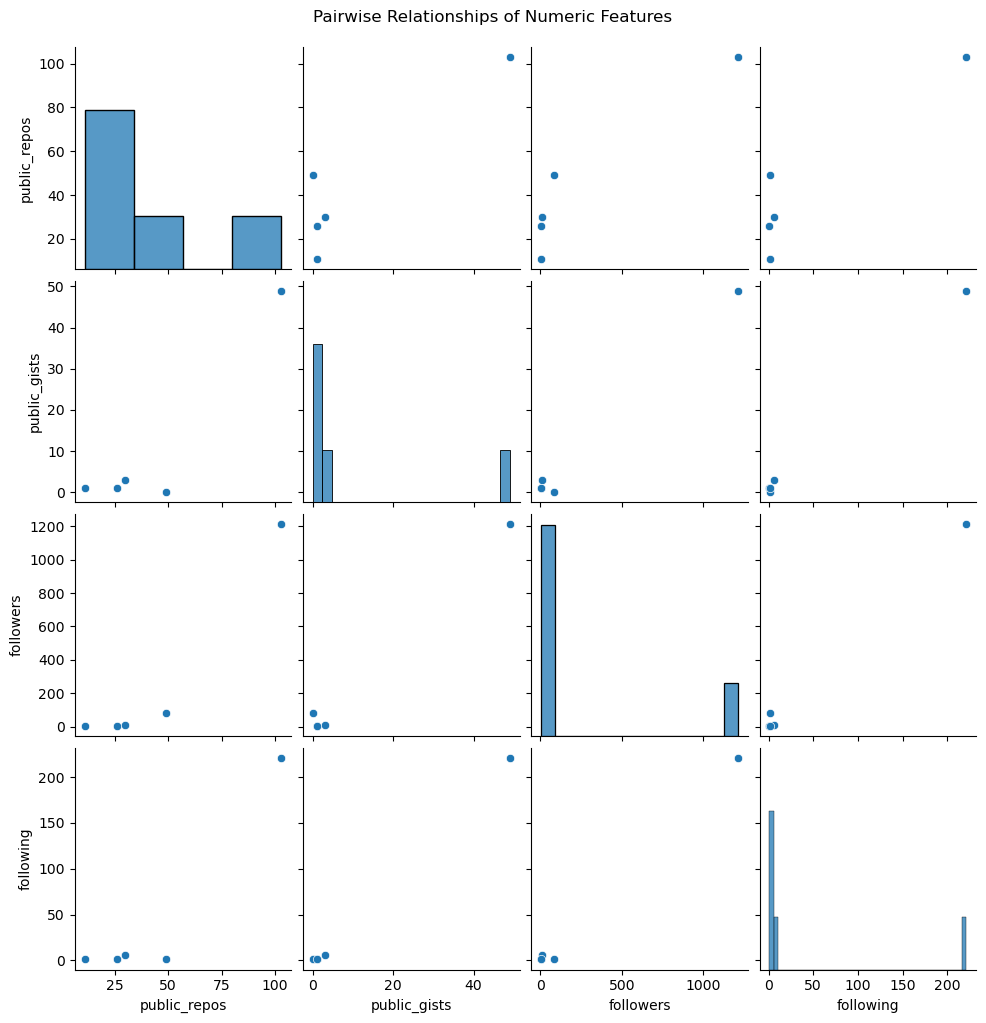

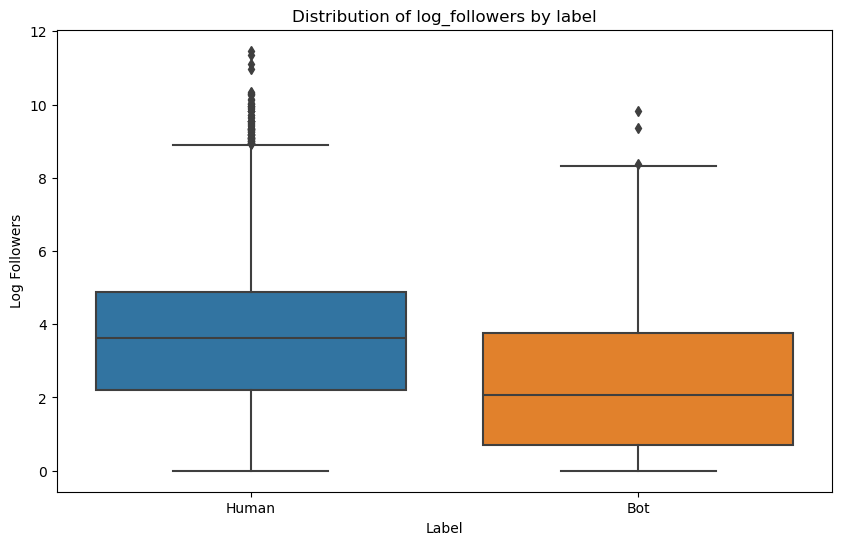

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

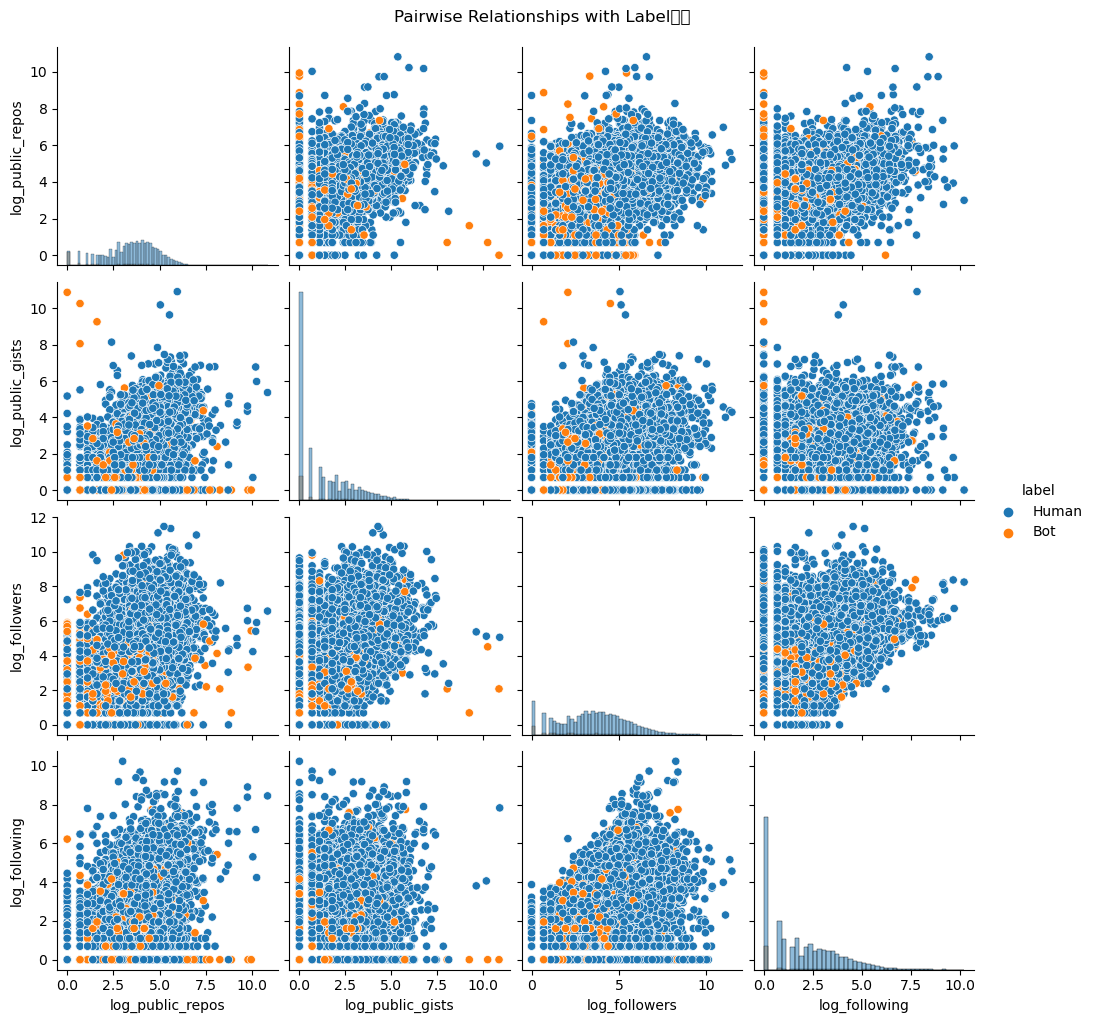

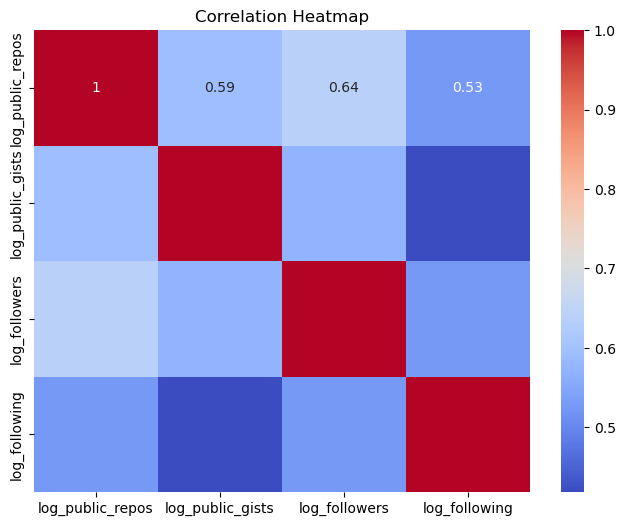

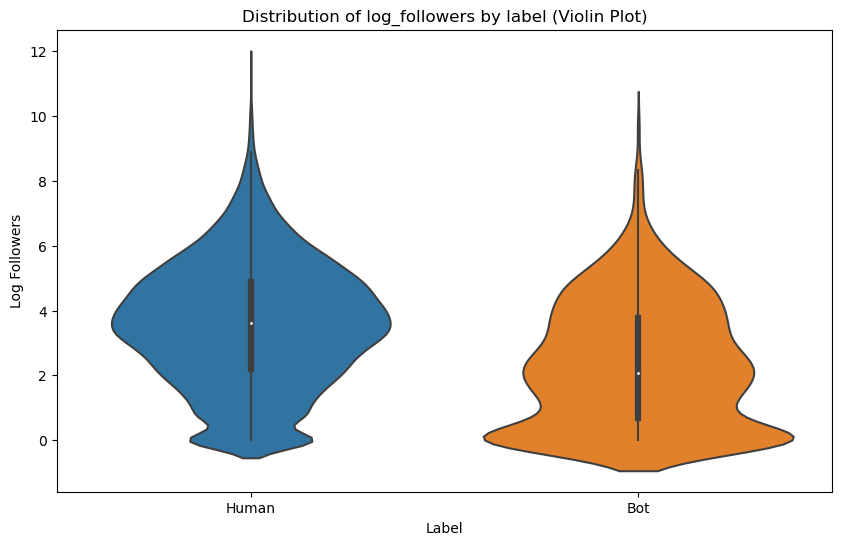

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
# 导入pandas库
import pandas as pd
# 从CSV文件中读取数据到Dataframe
df = pd.read_csv('github_bot_processed_data.csv')
# 设置pandas的显示选项
pd.set_option('display.max_rows',None)  # 显示所有行，而不是默认的有限数量的行
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None) # 设置显示最大列宽为 None，这样长字符串就不会被截断
pd.set_option('display.precision', 5)  # 设置浮点数显示精度为5位小数
pd.set_option('display.expand_frame_repr', True)  # 设置在输出时扩展显示多行数据，这样即使数据很多也能完整显示

# 使用head()方法,打印Dataframe的前5行数据
print("前几行数据：")
print(df.head())
# 使用 info() 方法，打印每列的数据类型信息
print("\n每列的数据类型：")
print(df.info())
# 使用describe()方法，打印数据的描述性统计
print("\n数据的描述性统计：")
print(df.describe())

# 取出Dataframe的前几行
head_df=df.head()
# 使用style.format来格式化前几行并展示
formatted_head_df = head_df.style.format({
    'created_at': '{:%Y-%m-%d}',    # 时间类型格式化
    'updated_at': '{:%Y-%m-%d}'
})
# 展示格式化后的前几行
formatted_head_df

# 导入numpy库
import numpy as np
# 在Dataframe中新建列来储存对数化后的数据
# 使用 np.log1p 来避免对 0 取对数
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])
# 打印对数化前后的几列数据，进行对比
print("\n查看变换前后的数据：")
print(df[['public_repos', 'log_public_repos', 'public_gists', 'log_public_gists', 'followers', 'log_followers', 'following', 'log_following']].head())

# 导入 matplotlib 和 seaborn 库
import matplotlib.pyplot as plt
import seaborn as sns

# 从DataFrame中选择 'label' 列，并计算每个类别的频数
# value_counts() 函数对 'label' 列进行计数，返回一个 Series，其中索引是唯一值，值是对应的计数
label_counts = df['label'].value_counts()
plt.figure(figsize=(8,6))
# 绘制条形图，横轴是类别（label_counts.index），纵轴是每个类别的计数（label_counts.values）
# 这里使用 label_counts.index 作为 x 轴的标签，label_counts.values 作为 y 轴的值
plt.bar(label_counts.index,label_counts.values)
plt.title('Label Category Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 选择布尔特征列
bool_features=['site_admin','company','blog','location','hireable']
# 使用 sum() 函数计算每个布尔特征列中 True 的数量
# 由于布尔值 True 被当作 1，False 被当作 0，所以 sum() 函数直接计算了 True 的个数
bool_counts_true = df[bool_features].sum()
# 使用 apply() 函数结合一个 lambda 函数计算每个布尔特征列中 False 的数量
# lambda x: x.eq(False).sum() 创建了一个匿名函数，对于每个传入的 Series（即每列），它检查哪些值是 False
# x.eq(False) 生成了一个相同长度的布尔 Series，其中 False 的位置为 True，True 的位置为 False
# .sum() 函数计算了每个 Series 中 True 的数量，即 False 的数量
# axis=0 参数指定 apply() 函数沿着列方向操作
bool_counts_false = df[bool_features].apply(lambda x: x.eq(False).sum(), axis=0)
plt.figure(figsize=(10, 6))
# 绘制第一个柱状图，表示每个布尔特征列中 True 的数量
# bool_counts_true.index 为 x 轴上的标签（特征名），bool_counts_true.values 为 y 轴上的值（True 的数量）
plt.bar(bool_counts_true.index, bool_counts_true.values, label='True')
# 在第一个柱状图的基础上，绘制第二个柱状图，表示每个布尔特征列中 False 的数量
# bool_counts_false.index 为 x 轴上的标签（特征名），bool_counts_false.values 为 y 轴上的值（False 的数量）
# bottom=bool_counts_true.values 参数将 False 的柱状图叠加在 True 的柱状图之上
plt.bar(bool_counts_false.index, bool_counts_false.values, bottom=bool_counts_true.values, label='False')
plt.title('Boolean Feature Distribution')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
# 绘制直方图，bins=20 表示分成 20 个箱子，density=True 表示归一化，alpha 设置透明度，color 设置颜色
plt.hist(df['log_public_repos'], bins=20, density=True, alpha=0.6, color='g')
plt.title('Log Public Repositories Distribution')
plt.xlabel('Log Public Repositories')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
# 绘制散点图，横轴为 public_repos，纵轴为 followers
plt.scatter(df['public_repos'], df['followers'])
plt.title('Public Repositories vs Followers')
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.show()

# 选择数值型特征列
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
# 使用 seaborn 的 pairplot 函数绘制成对关系图
sns.pairplot(head_df[numeric_features])
plt.suptitle('Pairwise Relationships of Numeric Features', y=1.02)
plt.show()

# 绘制不同 'label' 类别下 'log_followers' 列的箱线图，探索分类变量与数值变量之间的关系
plt.figure(figsize=(10, 6))
# 绘制箱线图，x 轴为分类变量 label，y 轴为数值变量 log_followers
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Distribution of log_followers by label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

# 使用 seaborn 的 pairplot 函数绘制成对关系图，hue 参数用于分类颜色，diag_kind='hist' 表示对角线使用直方图
numeric_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.pairplot(df[numeric_features + ['label']], hue='label', diag_kind='hist')
plt.suptitle('Pairwise Relationships with Label分类', y=1.02)
plt.show()

# 计算相关性矩阵
corr_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
# 绘制热图，annot=True 表示显示数值，cmap='coolwarm' 设置颜色映射
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
# 绘制小提琴图，x 轴为分类变量 label，y 轴为数值变量 log_followers
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Distribution of log_followers by label (Violin Plot)')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile